In [1]:
# imports
from importlib import reload

import os # a module to interact with the operating system
os.environ["ENDPOINT_URL"]="http://rook-ceph-rgw-nautiluss3.rook"
import numpy as np

import pandas as pd
import xarray
import h5py
import healpy as hp
import time

import cartopy.crs as ccrs
from cartopy.mpl.gridliner import LONGITUDE_FORMATTER, LATITUDE_FORMATTER

from matplotlib import pyplot as plt
import seaborn as sns
import scipy.stats as stats

from ulmo import io as ulmo_io
from ulmo import plotting
from ulmo.llc import io as llc_io
from ulmo.llc import plotting as llc_plotting

from ulmo.utils import image_utils
from ulmo.analysis import figures as ulmo_figs
from ulmo.plotting import plotting as ulmo_plotting
from ulmo.analysis import spatial_plots as sp
from ulmo.plotting import gallery as ulmo_gallery

ModuleNotFoundError: No module named 'xarray'

In [2]:
v98 = ulmo_io.load_main_table('s3://viirs/Tables/VIIRS_all_98clear_std.parquet')
llc = ulmo_io.load_main_table('s3://llc/Tables/LLC_uniform144_r0.5.parquet')

Read main table: s3://viirs/Tables/VIIRS_all_98clear_std.parquet
Read main table: s3://llc/Tables/LLC_uniform144_r0.5.parquet


In [3]:
v98['DT'] = v98.T90 - v98.T10

In [4]:
llc['DT'] = llc.T90 - llc.T10

# Picture Gulfstream

In [5]:
evts_v98 = np.load('evts_v98', allow_pickle=True)
hp_lons_v98 = np.load('hp_lons_v98', allow_pickle=True)
hp_lats_v98 = np.load('hp_lats_v98', allow_pickle=True)
meds_v98 = np.load('meds_v98', allow_pickle=True)
evts_llc= np.load('evts_llc', allow_pickle=True)
hp_lons_llc= np.load('hp_lons_llc', allow_pickle=True)
hp_lats_llc= np.load('hp_lats_llc', allow_pickle=True)
meds_llc= np.load('meds_llc', allow_pickle=True)

In [6]:
mean = pd.read_csv('12yrmean.ml'   ,names=['lon','lat'], header=None)
north= pd.read_csv('82to86north.ml',names=['lon','lat'], header=None)
south= pd.read_csv('82to86south.ml',names=['lon','lat'], header=None)

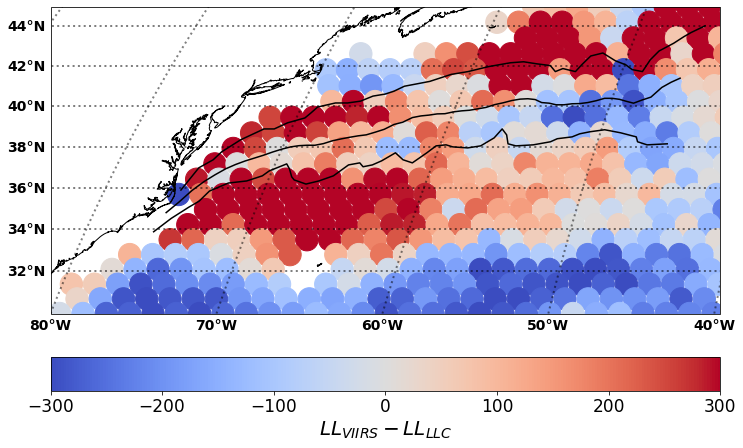

In [7]:
fig = plt.figure(figsize=(12,8))
plt.clf()

tformM = ccrs.Mollweide()
tformP = ccrs.PlateCarree()

ax = plt.axes(projection=tformM)

cm = plt.get_cmap('coolwarm')
# Cut
good = np.invert(meds_v98.mask)
img = plt.scatter(x=hp_lons_llc[good],
    y=hp_lats_llc[good],
    c=meds_v98[good]- meds_llc[good], vmin = -300, vmax = 300, 
    cmap=cm,
    s=500,
    transform=tformP)
img1 = plt.plot(mean.lon.values,  mean.lat.values,  'k-', transform=tformP)
img2 = plt.plot(north.lon.values, north.lat.values, 'k-', transform=tformP)
img3 = plt.plot(south.lon.values, south.lat.values, 'k-', transform=tformP)

# Colorbar
cb = plt.colorbar(img, orientation='horizontal', pad=0.1)
clbl = r'$LL_{VIIRS} - LL_{LLC}$'
cb.set_label(clbl, fontsize=20.)
cb.ax.tick_params(labelsize=17)

# Coast lines

ax.coastlines(zorder=10)
ax.set_extent([-80, -45, 30, 45], ccrs.PlateCarree())

gl = ax.gridlines(crs=ccrs.PlateCarree(), linewidth=2, x_inline=False, y_inline=False, 
        color='black', alpha=0.5, linestyle=':', draw_labels=True)
gl.top_labels=False
gl.bottom_labels=True
gl.left_labels=True
gl.right_labels=False
#gl.xformatter = LONGITUDE_FORMATTER
#gl.yformatter = LATITUDE_FORMATTER
gl.xlabel_style = {'color': 'black', 'size': 14, 'weight': 'bold'}
gl.ylabel_style = {'color': 'black', 'size': 14, 'weight': 'bold'}

#plt.savefig('gulfstream', dpi = 600)

# Fake & Real

In [8]:
R2 = dict( lon=-65, dlon=5., lat=35, dlat=1)
R1 = dict( lon=-55, dlon=5., lat=41, dlat=1)

In [9]:
real, fake = [((np.abs(v98.lon.values - R['lon']) < R['dlon']) & (np.abs(v98.lat.values - R['lat']) < R['dlat'])) for R in [R1, R2]]

In [10]:
reall, fakel = [((np.abs(llc.lon.values - R['lon']) < R['dlon']) & (np.abs(llc.lat.values - R['lat']) < R['dlat'])) for R in [R1, R2]]

In [11]:
vreal = v98[real]
vfake = v98[fake]
lreal = llc[reall]
lfake = llc[fakel]

/opt/conda/lib/python3.9/site-packages/cartopy/mpl/gridliner.py:451: UserWarning: The .xlabels_top attribute is deprecated. Please use .top_labels to toggle visibility instead.
  warnings.warn('The .xlabels_top attribute is deprecated. Please '
/opt/conda/lib/python3.9/site-packages/cartopy/mpl/gridliner.py:475: UserWarning: The .ylabels_left attribute is deprecated. Please use .left_labels to toggle visibility instead.
  warnings.warn('The .ylabels_left attribute is deprecated. Please '
/opt/conda/lib/python3.9/site-packages/cartopy/mpl/gridliner.py:487: UserWarning: The .ylabels_right attribute is deprecated. Please use .right_labels to toggle visibility instead.
  warnings.warn('The .ylabels_right attribute is deprecated. Please '


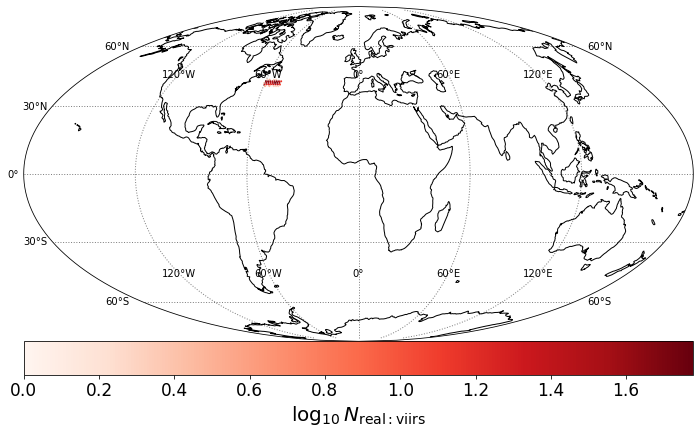

In [31]:
_ = ulmo_figs.show_spatial(vreal, lbl = 'real:viirs')

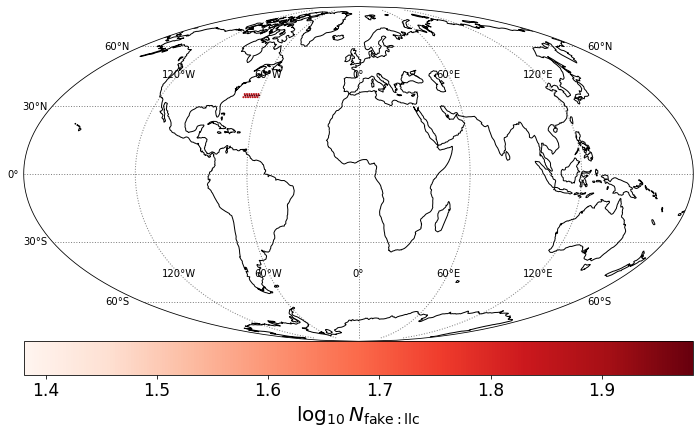

In [32]:
_ = ulmo_figs.show_spatial(lfake, lbl = 'fake:llc')

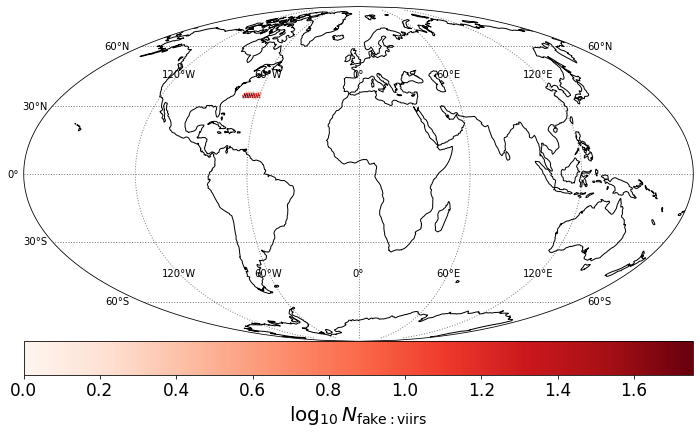

In [33]:
_ = ulmo_figs.show_spatial(vfake, lbl = 'fake:viirs')

In [34]:
vfake.head()

,filename,row,col,lat,lon,clear_fraction,field_size,datetime,ex_filename,pp_file,pp_root,pp_idx,pp_type,mean_temperature,Tmin,Tmax,T90,T10,LL,MODIS_LL
46268,s3://viirs/data/2012/075/20120315170000-OSPO-L...,4656,1728,35.873066,-64.51743,1.491970e-03,192,2012-03-15 17:00:00,s3://viirs/Extractions/VIIRS_2012_95clear_192x...,s3://viirs/PreProc/VIIRS_2012_95clear_192x192_...,viirs_std,357248,0,19.327171,18.470001,20.059998,19.829987,19.000000,144.896057,174.959290
46269,s3://viirs/data/2012/075/20120315170000-OSPO-L...,4656,1824,35.721220,-65.39223,1.093207e-02,192,2012-03-15 17:00:00,s3://viirs/Extractions/VIIRS_2012_95clear_192x...,s3://viirs/PreProc/VIIRS_2012_95clear_192x192_...,viirs_std,492636,0,19.231632,18.470001,20.049988,19.579987,19.000000,200.380554,253.660767
46270,s3://viirs/data/2012/075/20120315170000-OSPO-L...,4656,1920,35.551480,-66.32525,9.440104e-03,192,2012-03-15 17:00:00,s3://viirs/Extractions/VIIRS_2012_95clear_192x...,s3://viirs/PreProc/VIIRS_2012_95clear_192x192_...,viirs_std,506131,0,19.266407,18.670013,19.839996,19.579987,19.049988,354.466003,374.819824
46271,s3://viirs/data/2012/075/20120315170000-OSPO-L...,4656,2016,35.356987,-67.34353,8.124650e-16,192,2012-03-15 17:00:00,s3://viirs/Extractions/VIIRS_2012_95clear_192x...,s3://viirs/PreProc/VIIRS_2012_95clear_192x192_...,viirs_std,917430,0,19.630623,18.859985,21.420013,20.309998,19.109985,211.087219,241.703613
46272,s3://viirs/data/2012/075/20120315170000-OSPO-L...,4656,2112,35.141700,-68.41559,4.503038e-03,192,2012-03-15 17:00:00,s3://viirs/Extractions/VIIRS_2012_95clear_192x...,s3://viirs/PreProc/VIIRS_2012_95clear_192x192_...,viirs_std,782714,0,19.873945,18.540009,21.910004,20.510010,19.220001,114.312073,108.303162


# Galleries

In [12]:
tbl = llc
south=34
north=36
mid_lon=65
dlon=5

rect = (tbl.lat > south ) & (tbl.lat < north) & (np.abs(tbl.lon + mid_lon) < dlon)
tbl1 = tbl[ rect ]

#calculate median LL
med_LL = np.median(tbl1.LL.to_numpy())
print('Median LL is {}.'.format(med_LL))

Median LL is -130.39395141601562.


Median LL is 220.58587646484375.
Temperature scale is -5.121586799621582 to 3.192821502685547.


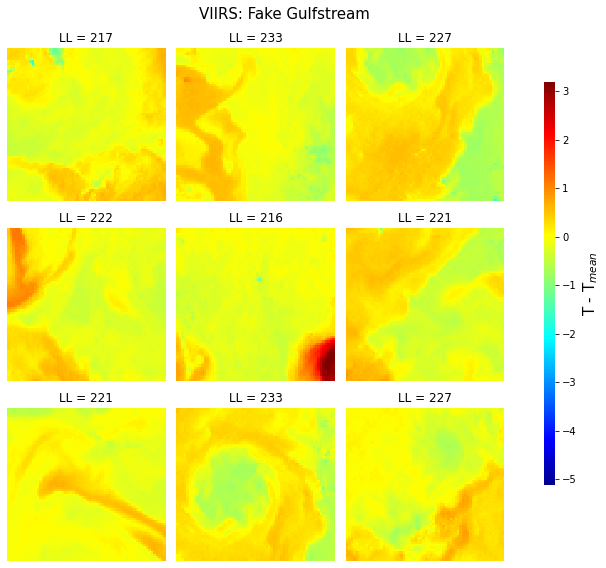

In [21]:
ulmo_gallery.gallery(tbl=v98, a=3, b=3, dLL=20, south=34, north=36, mid_lon=65, dlon=5, tmin=-5.121586799621582, tmax=3.192821502685547, title='VIIRS: Fake Gulfstream')

Median LL is -130.39395141601562.
Temperature scale is -5.121586799621582 to 3.192821502685547.


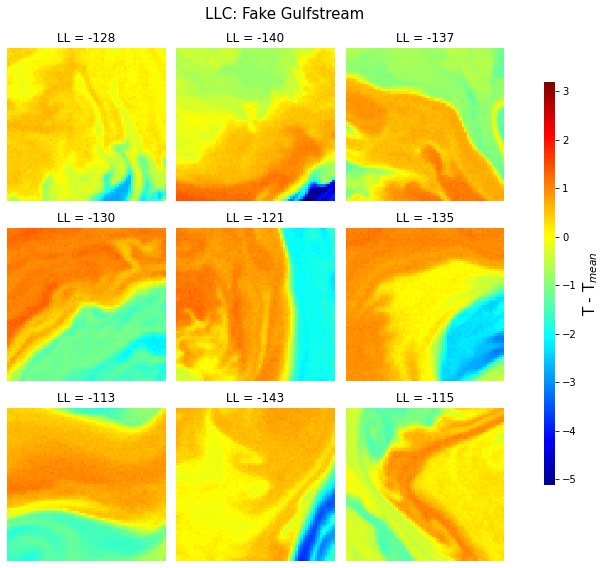

In [20]:
ulmo_gallery.gallery(tbl=llc, a=3, b=3, dLL=20, south=34, north=36, mid_lon=65, dlon=5, tmin=-5.121586799621582, tmax=3.192821502685547, title='LLC: Fake Gulfstream')

Median LL is -228.86578369140625.
Temperature scale is -5.121586799621582 to 3.192821502685547.


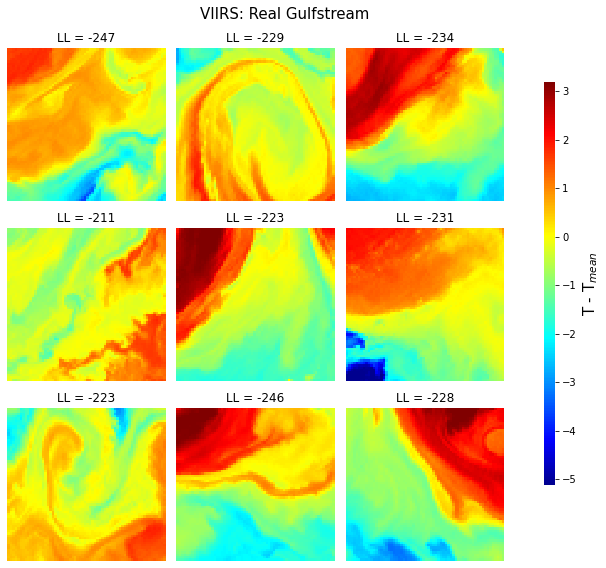

In [19]:
ulmo_gallery.gallery(tbl=v98, a=3, b=3, dLL=20, south=40, north=42, mid_lon=55, dlon=5, tmin=-5.121586799621582, tmax=3.192821502685547, title='VIIRS: Real Gulfstream')

Median LL is -340.8522186279297.
Temperature scale is -5.121586799621582 to 3.192821502685547.


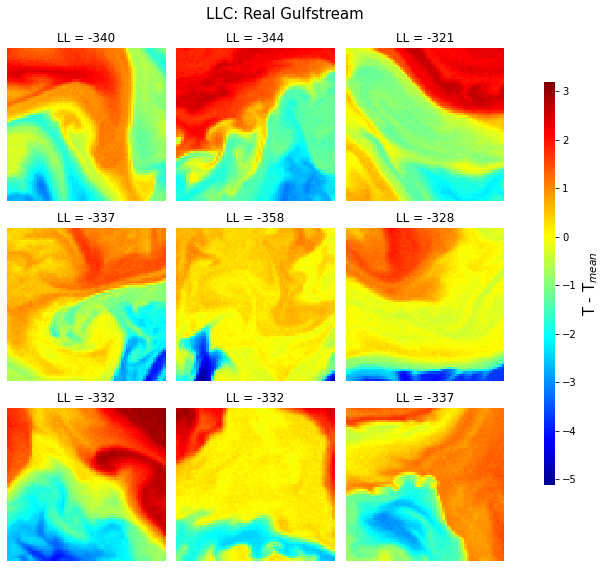

In [18]:
ulmo_gallery.gallery(tbl=llc, a=3, b=3, dLL=20, south=40, north=42, mid_lon=55, dlon=5, tmin=True, tmax=True, title='LLC: Real Gulfstream')

# Distributions

In [21]:
south=0
north=2
mid_lon=100
dlon=5

In [22]:
rect = (v98.lat > south ) & (v98.lat < north) & (np.abs(v98.lon + mid_lon) < dlon)
viirs_np = v98[ rect ]

In [23]:
rect = (llc.lat > south ) & (llc.lat < north) & (np.abs(llc.lon + mid_lon) < dlon)
llc_np = llc[ rect ]

In [24]:
south=-2
north=0
mid_lon=100
dlon=5

In [25]:
rect = (v98.lat > south ) & (v98.lat < north) & (np.abs(v98.lon + mid_lon) < dlon)
viirs_sp = v98[ rect ]

In [26]:
rect = (llc.lat > south ) & (llc.lat < north) & (np.abs(llc.lon + mid_lon) < dlon)
llc_sp = llc[ rect ]

Text(0.5, 0.98, 'North of Equator')

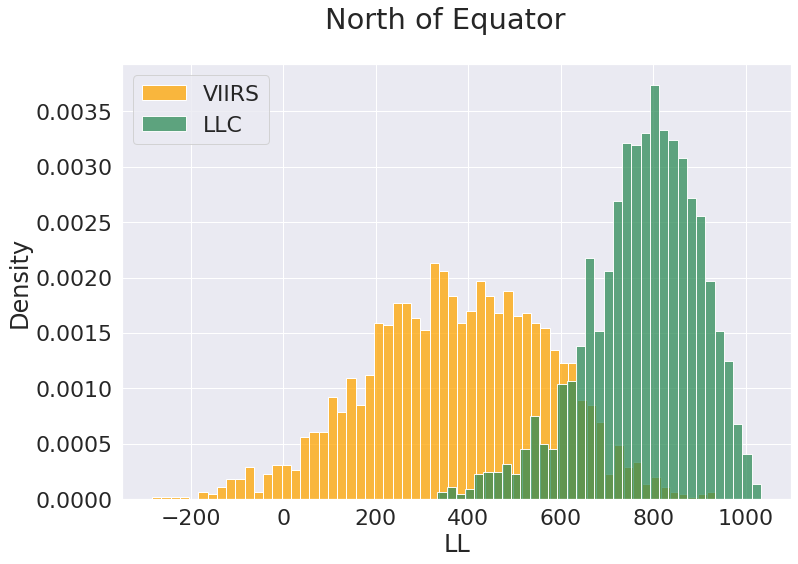

In [48]:
fig, ax = plt.subplots(1, 1, figsize = (12,8))
sns.set(font_scale = 2)
ax = sns.histplot( data = viirs_np, x = 'LL', binwidth= 20, color = 'orange', stat = 'density', label='VIIRS')
ax = sns.histplot( data = llc_np, x = 'LL', binwidth= 20, color = 'seagreen', stat = 'density', label='LLC')
                  
ax.legend()
fig.suptitle('North of Equator')

Text(0.5, 0.98, 'North of Equator')

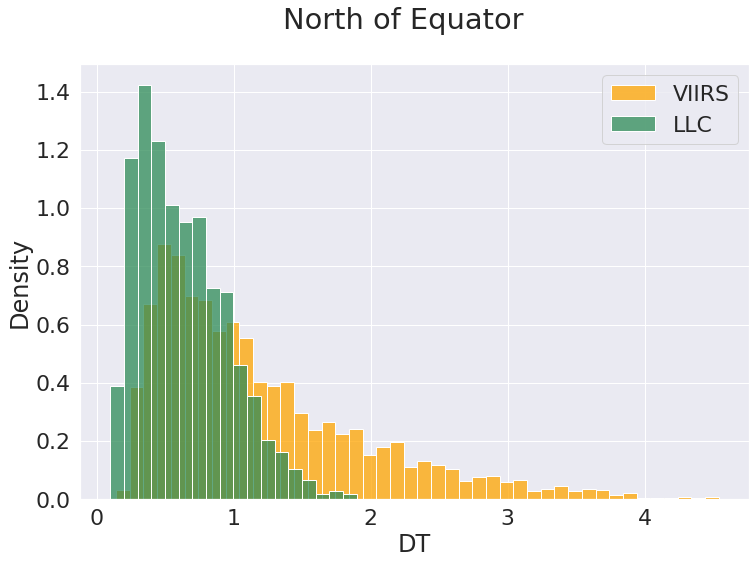

In [49]:
fig, ax = plt.subplots(1, 1, figsize = (12,8))
sns.set(font_scale = 2)
ax = sns.histplot( data = viirs_np, x = 'DT', binwidth= 0.1, color = 'orange', stat = 'density', label='VIIRS')
ax = sns.histplot( data = llc_np, x = 'DT', binwidth= 0.1, color = 'seagreen', stat = 'density', label='LLC')
                  
ax.legend()
fig.suptitle('North of Equator')

Text(0.5, 0.98, 'South of Equator')

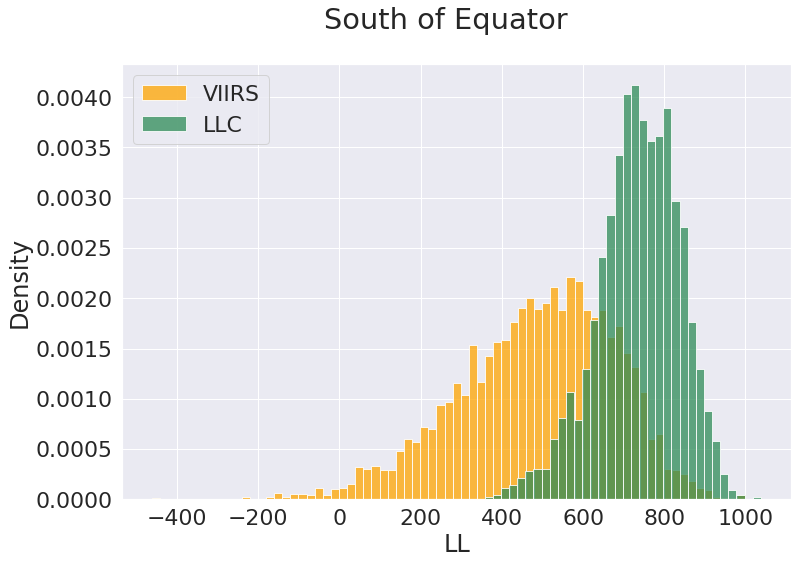

In [50]:
fig, ax = plt.subplots(1, 1, figsize = (12,8))
sns.set(font_scale = 2)
ax = sns.histplot( data = viirs_sp, x = 'LL', binwidth= 20, color = 'orange', stat = 'density', label='VIIRS')
ax = sns.histplot( data = llc_sp, x = 'LL', binwidth= 20, color = 'seagreen', stat = 'density', label='LLC')
                  
ax.legend()
fig.suptitle('South of Equator')

Text(0.5, 0.98, 'South of Equator')

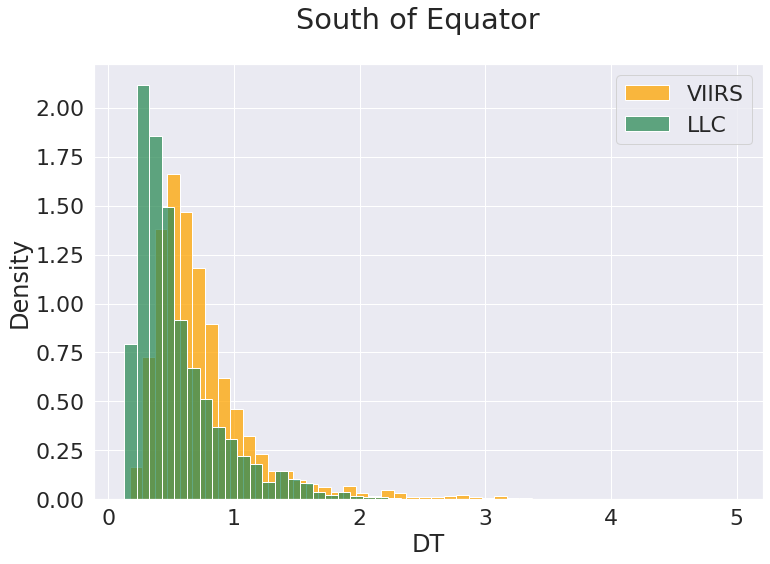

In [51]:
fig, ax = plt.subplots(1, 1, figsize = (12,8))
sns.set(font_scale = 2)
ax = sns.histplot( data = viirs_sp, x = 'DT', binwidth= 0.1, color = 'orange', stat = 'density', label='VIIRS')
ax = sns.histplot( data = llc_sp, x = 'DT', binwidth= 0.1, color = 'seagreen', stat = 'density', label='LLC')
                  
ax.legend()
fig.suptitle('South of Equator')

Text(0.5, 0.98, 'VIIRS')

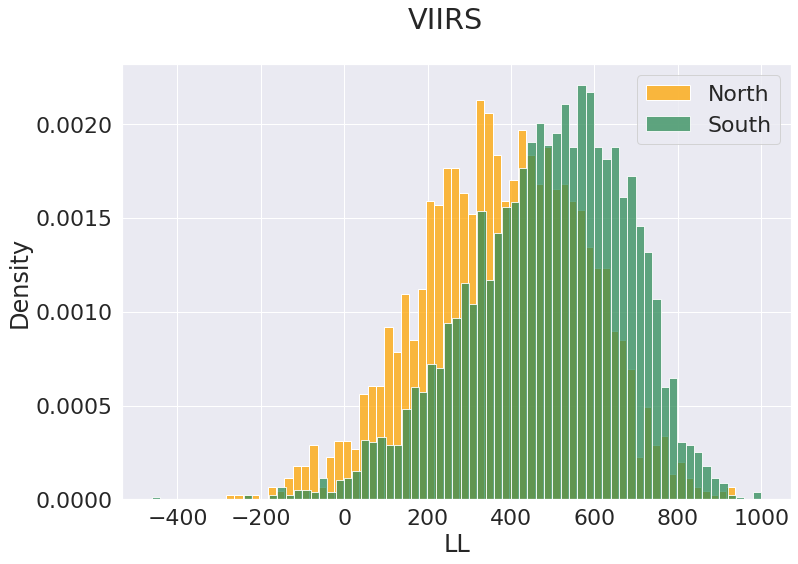

In [52]:
fig, ax = plt.subplots(1, 1, figsize = (12,8))
sns.set(font_scale = 2)
ax = sns.histplot( data = viirs_np, x = 'LL', binwidth= 20, color = 'orange', stat = 'density', label='North')
ax = sns.histplot( data = viirs_sp, x = 'LL', binwidth= 20, color = 'seagreen', stat = 'density', label='South')
                  
ax.legend()
fig.suptitle('VIIRS')

Text(0.5, 0.98, 'VIIRS')

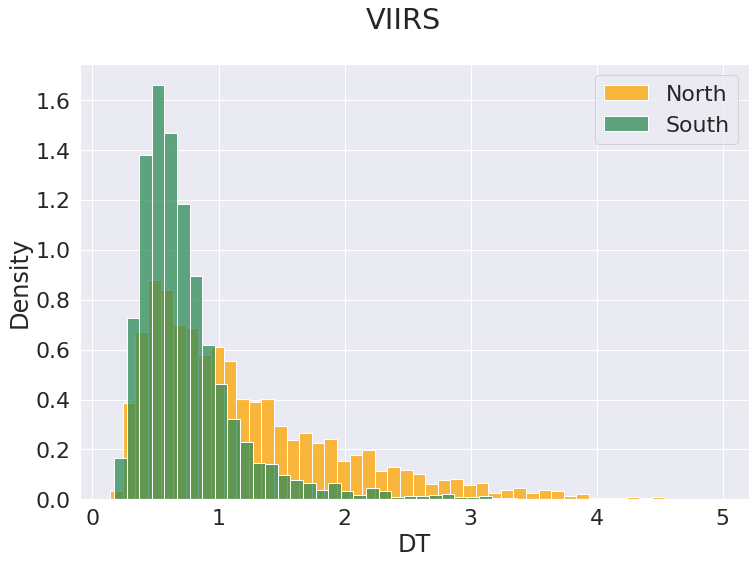

In [53]:
fig, ax = plt.subplots(1, 1, figsize = (12,8))
sns.set(font_scale = 2)
ax = sns.histplot( data = viirs_np, x = 'DT', binwidth= 0.1, color = 'orange', stat = 'density', label='North')
ax = sns.histplot( data = viirs_sp, x = 'DT', binwidth= 0.1, color = 'seagreen', stat = 'density', label='South')
                  
ax.legend()
fig.suptitle('VIIRS')

Text(0.5, 0.98, 'LLC')

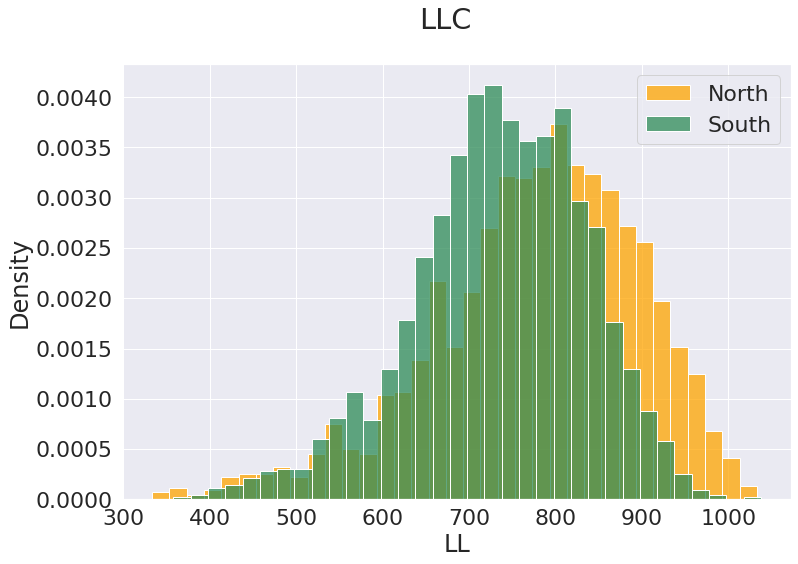

In [54]:
fig, ax = plt.subplots(1, 1, figsize = (12,8))
sns.set(font_scale = 2)
ax = sns.histplot( data = llc_np, x = 'LL', binwidth= 20, color = 'orange', stat = 'density', label='North')
ax = sns.histplot( data = llc_sp, x = 'LL', binwidth= 20, color = 'seagreen', stat = 'density', label='South')
                  
ax.legend()
fig.suptitle('LLC')

Text(0.5, 0.98, 'LLC')

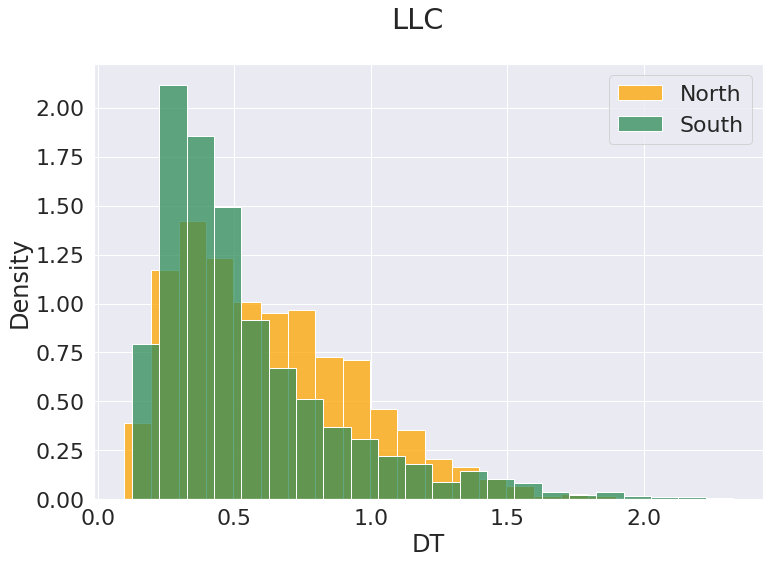

In [55]:
fig, ax = plt.subplots(1, 1, figsize = (12,8))
sns.set(font_scale = 2)
ax = sns.histplot( data = llc_np, x = 'DT', binwidth= 0.1, color = 'orange', stat = 'density', label='North')
ax = sns.histplot( data = llc_sp, x = 'DT', binwidth= 0.1, color = 'seagreen', stat = 'density', label='South')
                  
ax.legend()
fig.suptitle('LLC')

# LLC Comparison

In [59]:
sns.set(font_scale = 1)

Median LL is 790.4640808105469.
Temperature scale is -0.97503662109375 to 0.8544101715087891.


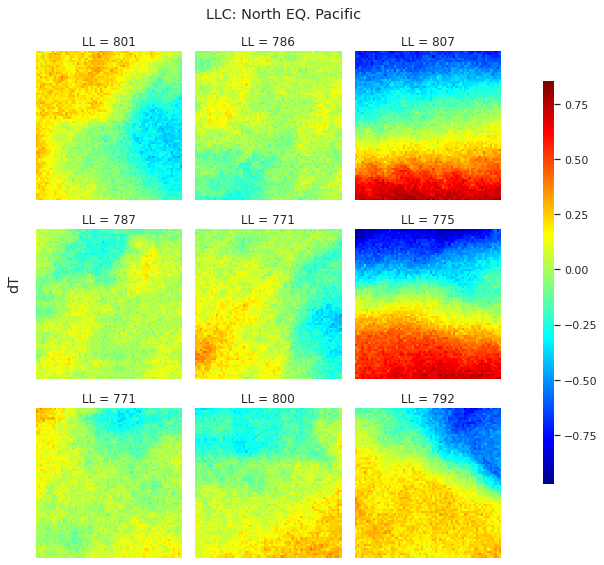

In [60]:
ulmo_gallery.gallery(tbl=llc, title='LLC: North EQ. Pacific')

Median LL is 739.8324890136719.
Temperature scale is -0.97503662109375 to 0.8544101715087891.


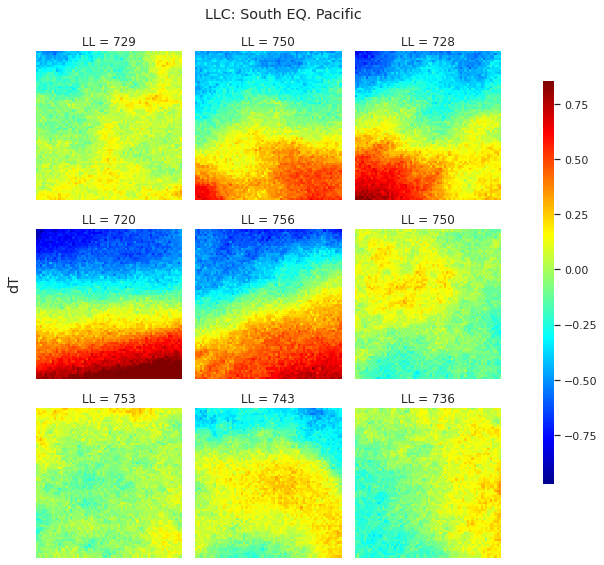

In [61]:
ulmo_gallery.gallery(tbl=llc, south=-2, north=0, tmin=-0.97503662109375, tmax=0.8544101715087891, title='LLC: South EQ. Pacific')

# VIIRS Comparison

Median LL is 379.8913269042969.
Temperature scale is -1.186056137084961 to 2.349224090576172.


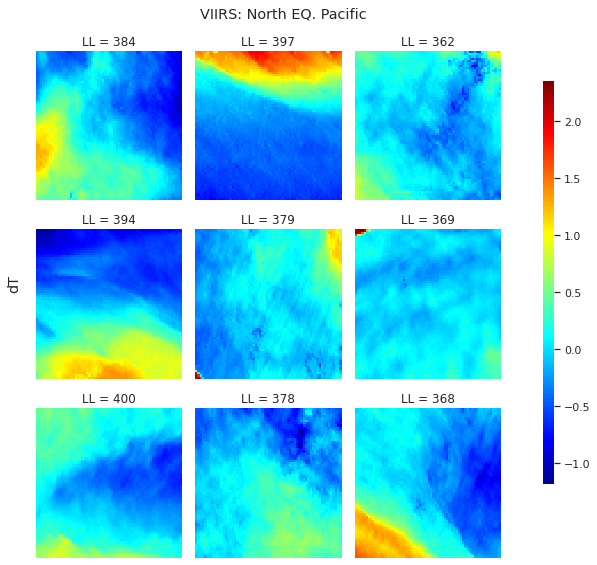

In [64]:
ulmo_gallery.gallery(tbl=v98, title='VIIRS: North EQ. Pacific')

Median LL is 505.50390625.
Temperature scale is -1.186056137084961 to 2.349224090576172.


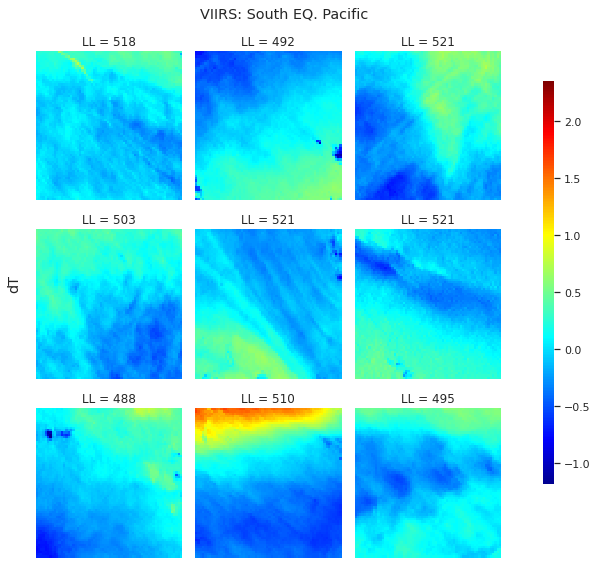

In [65]:
ulmo_gallery.gallery(tbl=v98, south = -2, north = 0, tmin=-1.186056137084961, tmax = 2.349224090576172, title='VIIRS: South EQ. Pacific')